# ML Course 3 - Practice

## Subject

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

![](linReg.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
179,2014,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,Z,17.0,11.8,14.7,19,338
663,2014,LEXUS,IS 250 AWD,COMPACT,2.5,6,AS6,Z,11.8,8.7,10.4,27,239
344,2014,FORD,E150 VAN FFV,VAN - CARGO,4.6,8,A4,E,24.1,19.2,21.9,13,350
478,2014,GMC,YUKON XL,SUV - STANDARD,5.3,8,A6,E,21.5,14.6,18.4,15,294
574,2014,JEEP,CHEROKEE 4X4 Active Drive II,SUV - SMALL,3.2,6,A9,X,12.5,9.1,11.0,26,253
139,2014,BMW,Z4 sDRIVE35is,TWO-SEATER,3.0,6,AM7,Z,13.7,10.1,12.1,23,278


1. Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 
2. Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?
3. Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).
4. What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 
5. Plot the regression line over the data.
6. Plot the distribution of the residuals (i.e. the error terms).
7. Evaluate the performance of the model (MSE, RMSE, MAE, $R^2$).
8. Can you calculate those same performance metrics for an untrained regression model where the intercept and the coefficient would be both 0? Are you surprised by the measured performance? (what's TSS, ESS, RSS when beta0 = 0 and beta1=0)
9. Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and evaluate its performance. Compare with the metrics computed in question 7 (the model trained on the engine size). What can you conclude?
* Now make a "dummy" model that simply predicts the mean CO2, regardless of the input engine size. Can you plot the regression line of such a model and calculate its performance? How does the performance compare to the the other models'? Can you explain why?  

__HINT__: as you will be performing the same operations multiple times on different data sets with different variables, you might want to wrap some pieces of code in functions in order to be able to reuse it easily in different places of your notebook!

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


#### 1. Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 

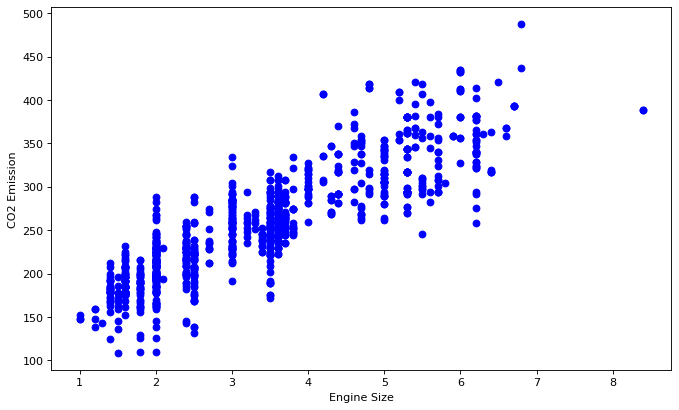

In [18]:
plt.figure(figsize=(10, 6), dpi= 80)
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()


In [21]:
# gives the correlation value
data[['CO2EMISSIONS', 'ENGINESIZE']].corr()

,CO2EMISSIONS,ENGINESIZE
CO2EMISSIONS,1.000000,0.874154
ENGINESIZE,0.874154,1.000000
